### Capstone project: Sentiment analysis on scientific papers reviews.

#### Important: Run this notebook after running "review_GitHub" NOTEBOOK

In [1]:
# BERT: https://github.com/dccuchile/beto

In [2]:
# !pip install sentiment-analysis-spanish
# !pip install keras tensorflow
# !pip install textblob

In [3]:
import pandas as pd
import numpy as np
import nltk
import json
import re
import os
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sentiment_analysis_spanish import sentiment_analysis
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer


In [4]:
# Read the lemmatize CSV file into a dataframe

df = pd.read_csv('lemma.csv', index_col = 0)

df.head()

,level_0,confidence,evaluation,id,lan,orientation,remarks,text,timespan,length,new_text,Lemma_text,Lemma_length
0,0,4.0,1,1,es,0,NaN,- El artículo aborda un problema contingente y...,2010-07-05,575,artículo aborda problema contingente y relevan...,artículo abordo problema contingente y relevan...,331
1,0,4.0,1,2,es,1,NaN,El artículo presenta recomendaciones prácticas...,2010-07-05,618,artículo presenta recomendaciones prácticas de...,artículo presentar recomendación práctico desa...,433
2,0,5.0,1,3,es,1,NaN,- El tema es muy interesante y puede ser de mu...,2010-07-05,1259,tema interesante y ayuda guía incorporar práct...,tema interesante y ayuda guío incorporar práct...,731
3,1,4.0,2,1,es,1,NaN,Se explica en forma ordenada y didáctica una e...,2010-07-05,1350,explica forma ordenada y didáctica experiencia...,explicar forma ordenado y didáctico experienci...,911
4,1,4.0,2,3,es,0,NaN,Los autores describen una metodología para des...,2010-07-05,1938,autores describen metodología desarrollar form...,autor describir metodología desarrollar forma ...,1178


In [5]:
# Drop some columns

df_sent = df.drop(['id', 'lan', 'remarks', 'text','timespan', 'length', 'new_text', 'Lemma_length' ],axis=1)
df_sent.head()

,level_0,confidence,evaluation,orientation,Lemma_text
0,0,4.0,1,0,artículo abordo problema contingente y relevan...
1,0,4.0,1,1,artículo presentar recomendación práctico desa...
2,0,5.0,1,1,tema interesante y ayuda guío incorporar práct...
3,1,4.0,2,1,explicar forma ordenado y didáctico experienci...
4,1,4.0,2,0,autor describir metodología desarrollar forma ...


In [6]:
# Find the sentiment in each review using SentimentAnalysisSpanish 

sentiment = sentiment_analysis.SentimentAnalysisSpanish()

df_sent["sentiment_score"] = df_sent["Lemma_text"].apply(lambda x:sentiment.sentiment(x)).to_list()

df_sent.head()

,level_0,confidence,evaluation,orientation,Lemma_text,sentiment_score
0,0,4.0,1,0,artículo abordo problema contingente y relevan...,7.264827e-01
1,0,4.0,1,1,artículo presentar recomendación práctico desa...,9.282532e-01
2,0,5.0,1,1,tema interesante y ayuda guío incorporar práct...,7.295993e-04
3,1,4.0,2,1,explicar forma ordenado y didáctico experienci...,3.405986e-03
4,1,4.0,2,0,autor describir metodología desarrollar forma ...,1.416404e-08


In [60]:
# Count the scores lesser or equal to 0.5
less = df_sent[(df_sent["sentiment_score"]<=0.5)]["level_0"].count()
less

343

In [57]:
# Count the scores higher than 0.5
high = df_sent[(df_sent["sentiment_score"]>0.5)]["level_0"].count()
high

39

In [7]:
# Label the sentiment

df_sent["sentiment_es"] = df_sent["sentiment_score"].apply(lambda x : "Positive" if x > 0.55 else "Negative")
df_sent.head()

,level_0,confidence,evaluation,orientation,Lemma_text,sentiment_score,sentiment_es
0,0,4.0,1,0,artículo abordo problema contingente y relevan...,7.264827e-01,Positive
1,0,4.0,1,1,artículo presentar recomendación práctico desa...,9.282532e-01,Positive
2,0,5.0,1,1,tema interesante y ayuda guío incorporar práct...,7.295993e-04,Negative
3,1,4.0,2,1,explicar forma ordenado y didáctico experienci...,3.405986e-03,Negative
4,1,4.0,2,0,autor describir metodología desarrollar forma ...,1.416404e-08,Negative


In [45]:
!pip install wordcloud

In [46]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

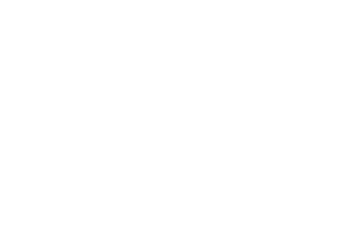

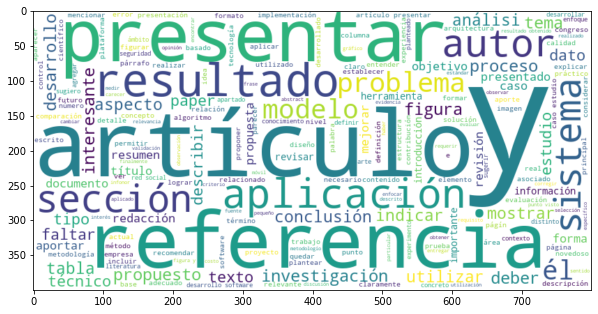

In [49]:
# Word cloud

# Text of all words in column "Lemma_text"

text = " ".join(review for review in df_sent["Lemma_text"].astype(str))
# Generate a word cloud image

wordcloud = WordCloud(background_color="white", width=800, height=400).generate(text)

# Display the generated image:
# the matplotlib way:

plt.axis("off")
plt.figure( figsize=(10,10))
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

### Translate from spanish to english

In [9]:
!pip install google_trans_new

In [10]:
from google_trans_new import google_translator  
translator = google_translator()  

In [11]:
# df_sent["Translate_eng"] = df_sent["Lemma_text"].apply(translator.translate, lang_src='es', lang_tgt='en').apply(getattr, args=('text',))

In [12]:
df_sent["Translate_eng"] = df_sent["Lemma_text"].apply(lambda x: translator.translate(x, lang_src='es', lang_tgt='en'))
df_sent.head()

,level_0,confidence,evaluation,orientation,Lemma_text,sentiment_score,sentiment_es,Translate_eng
0,0,4.0,1,0,artículo abordo problema contingente y relevan...,7.264827e-01,Positive,ARTICE ABOVE ABOUT THE CONTRIBUTE AND REVIEING...
1,0,4.0,1,1,artículo presentar recomendación práctico desa...,9.282532e-01,Positive,Article Submit Practical Recommendation Softwa...
2,0,5.0,1,1,tema interesante y ayuda guío incorporar práct...,7.295993e-04,Negative,Interesting and Help Guide Incorporate Practic...
3,1,4.0,2,1,explicar forma ordenado y didáctico experienci...,3.405986e-03,Negative,explain orderly and didactic shape experience ...
4,1,4.0,2,0,autor describir metodología desarrollar forma ...,1.416404e-08,Negative,Author Describe Methodology Develop collaborat...


In [13]:
# # Find if the words in my translated column are correct english words

# from nltk.corpus import wordnet
# #nltk.download('wordnet')

# print("Checking all tokens against Wordnet to find if there are all english words")

# def check_spelling(s):
    
#     return ' '.join(w for w in str(s).split(' ') TextBlob(w) str(w.correct()))

# df_sent["Translate_eng"] = df_sent["Translate_eng"].apply(check_spelling)

In [14]:
df_sent.head()

,level_0,confidence,evaluation,orientation,Lemma_text,sentiment_score,sentiment_es,Translate_eng
0,0,4.0,1,0,artículo abordo problema contingente y relevan...,7.264827e-01,Positive,ARTICE ABOVE ABOUT THE CONTRIBUTE AND REVIEING...
1,0,4.0,1,1,artículo presentar recomendación práctico desa...,9.282532e-01,Positive,Article Submit Practical Recommendation Softwa...
2,0,5.0,1,1,tema interesante y ayuda guío incorporar práct...,7.295993e-04,Negative,Interesting and Help Guide Incorporate Practic...
3,1,4.0,2,1,explicar forma ordenado y didáctico experienci...,3.405986e-03,Negative,explain orderly and didactic shape experience ...
4,1,4.0,2,0,autor describir metodología desarrollar forma ...,1.416404e-08,Negative,Author Describe Methodology Develop collaborat...


In [15]:
# # Find the sentiment in each review using TextBlob
from textblob import TextBlob

df_sent["TextBlob_sent_score"] = df_sent["Translate_eng"].apply(lambda x :TextBlob(x).sentiment.polarity)



In [16]:
# Label the TextBlob sentiment

df_sent["TextBlob_sent"] = df_sent["TextBlob_sent_score"].apply(lambda x : "Positive" if x > 0 else "Negative")
df_sent.head()

,level_0,confidence,evaluation,orientation,Lemma_text,sentiment_score,sentiment_es,Translate_eng,TextBlob_sent_score,TextBlob_sent
0,0,4.0,1,0,artículo abordo problema contingente y relevan...,7.264827e-01,Positive,ARTICE ABOVE ABOUT THE CONTRIBUTE AND REVIEING...,0.161111,Positive
1,0,4.0,1,1,artículo presentar recomendación práctico desa...,9.282532e-01,Positive,Article Submit Practical Recommendation Softwa...,0.600000,Positive
2,0,5.0,1,1,tema interesante y ayuda guío incorporar práct...,7.295993e-04,Negative,Interesting and Help Guide Incorporate Practic...,0.100000,Positive
3,1,4.0,2,1,explicar forma ordenado y didáctico experienci...,3.405986e-03,Negative,explain orderly and didactic shape experience ...,0.004545,Positive
4,1,4.0,2,0,autor describir metodología desarrollar forma ...,1.416404e-08,Negative,Author Describe Methodology Develop collaborat...,0.094048,Positive


In [62]:
# Count the scores lesser or equal to 0
less = df_sent[(df_sent["TextBlob_sent_score"]<=0)]["level_0"].count()
less

107

In [63]:
# Count the scores higher than 0
high = df_sent[(df_sent["TextBlob_sent_score"]>0)]["level_0"].count()
high

275

In [64]:
### Use VADER sentiment on the dataframe

#!pip install vaderSentiment

import nltk
#nltk.download('vader_lexicon')

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [18]:
# function to return the compound 
 
def vader_compound(row_text): 
    sentiment = ''
    # Define SentimentIntensityAnalyzer object of VADER. 
    SIA_obj = SentimentIntensityAnalyzer() 
  
    # calculate polarity scores which gives a sentiment dictionary, 
    # Contains pos, neg, neu, and compound scores.
 
    polarity_dict = SIA_obj.polarity_scores(row_text) 
        
    return polarity_dict['compound']

In [19]:
# # Find the compound in each review using Vader

df_sent["Vader_compound"] = df_sent["Translate_eng"].apply(lambda x :vader_compound(x))
df_sent.head()

,level_0,confidence,evaluation,orientation,Lemma_text,sentiment_score,sentiment_es,Translate_eng,TextBlob_sent_score,TextBlob_sent,Vader_compound
0,0,4.0,1,0,artículo abordo problema contingente y relevan...,7.264827e-01,Positive,ARTICE ABOVE ABOUT THE CONTRIBUTE AND REVIEING...,0.161111,Positive,0.2885
1,0,4.0,1,1,artículo presentar recomendación práctico desa...,9.282532e-01,Positive,Article Submit Practical Recommendation Softwa...,0.600000,Positive,0.9260
2,0,5.0,1,1,tema interesante y ayuda guío incorporar práct...,7.295993e-04,Negative,Interesting and Help Guide Incorporate Practic...,0.100000,Positive,0.8625
3,1,4.0,2,1,explicar forma ordenado y didáctico experienci...,3.405986e-03,Negative,explain orderly and didactic shape experience ...,0.004545,Positive,0.8271
4,1,4.0,2,0,autor describir metodología desarrollar forma ...,1.416404e-08,Negative,Author Describe Methodology Develop collaborat...,0.094048,Positive,0.8402


In [20]:


# function to print sentiments 
 
def vader_sentiment(row_text): 
    sentiment = ''
    # Define SentimentIntensityAnalyzer object of VADER. 
    SIA_obj = SentimentIntensityAnalyzer()
    polarity_dict = SIA_obj.polarity_scores(row_text)
    
    
      # Define overall sentiment by compound score
    if polarity_dict['compound'] > 0 :
        sentiment = "Positive" 
  
    else:
        sentiment ="Negative" 
  
    
        
    return sentiment

In [21]:
# # Find the sentiment in each review using Vader

df_sent["Vader_sentiment"] = df_sent["Translate_eng"].apply(lambda x :vader_sentiment(x))
df_sent.head()

,level_0,confidence,evaluation,orientation,Lemma_text,sentiment_score,sentiment_es,Translate_eng,TextBlob_sent_score,TextBlob_sent,Vader_compound,Vader_sentiment
0,0,4.0,1,0,artículo abordo problema contingente y relevan...,7.264827e-01,Positive,ARTICE ABOVE ABOUT THE CONTRIBUTE AND REVIEING...,0.161111,Positive,0.2885,Positive
1,0,4.0,1,1,artículo presentar recomendación práctico desa...,9.282532e-01,Positive,Article Submit Practical Recommendation Softwa...,0.600000,Positive,0.9260,Positive
2,0,5.0,1,1,tema interesante y ayuda guío incorporar práct...,7.295993e-04,Negative,Interesting and Help Guide Incorporate Practic...,0.100000,Positive,0.8625,Positive
3,1,4.0,2,1,explicar forma ordenado y didáctico experienci...,3.405986e-03,Negative,explain orderly and didactic shape experience ...,0.004545,Positive,0.8271,Positive
4,1,4.0,2,0,autor describir metodología desarrollar forma ...,1.416404e-08,Negative,Author Describe Methodology Develop collaborat...,0.094048,Positive,0.8402,Positive


In [65]:
# Count the scores lesser or equal to 0
less = df_sent[(df_sent["Vader_compound"]<=0)]["level_0"].count()
less

103

In [66]:
# Count the scores higher than 0
high = df_sent[(df_sent["Vader_compound"]>0)]["level_0"].count()
high

279

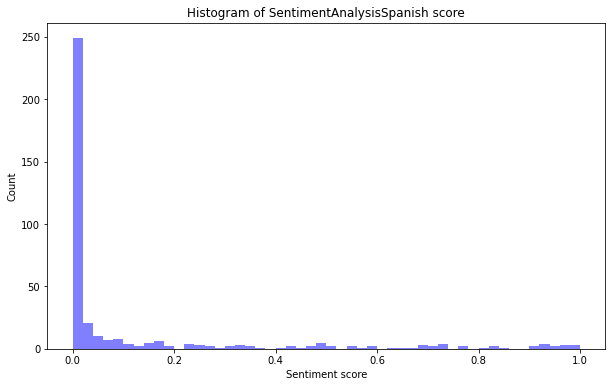

In [37]:
# Distribution of SentimentAnalysisSpanish 
#num_bins = 50
plt.figure(figsize=(10,6))
n, bins, patches = plt.hist(df_sent.sentiment_score, num_bins, facecolor='blue', alpha=0.5)
plt.xlabel('Sentiment score')
plt.ylabel('Count')
plt.title('Histogram of SentimentAnalysisSpanish score')
plt.show()

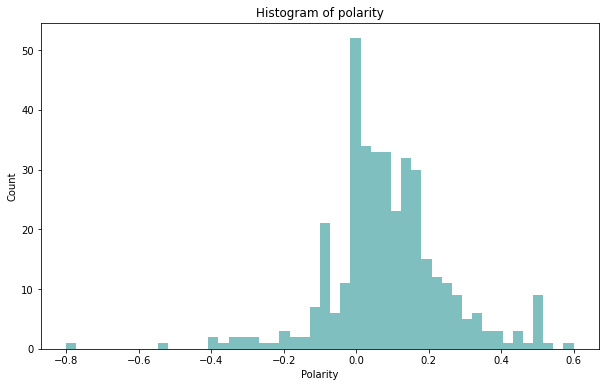

In [40]:
# Distribution of TextBblob Polarity
num_bins = 50
plt.figure(figsize=(10,6))
n, bins, patches = plt.hist(df_sent.TextBlob_sent_score, num_bins, facecolor='teal', alpha=0.5)
plt.xlabel('Polarity')
plt.ylabel('Count')
plt.title('Histogram of polarity')
plt.show()

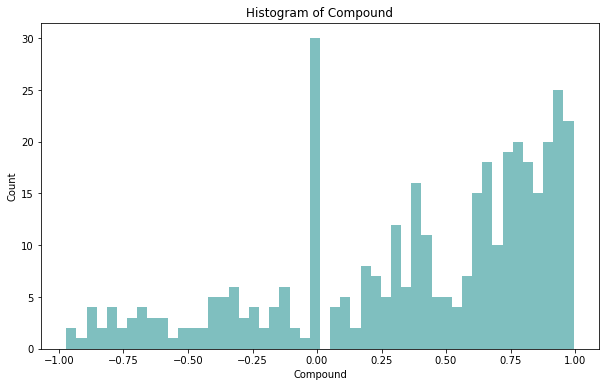

In [61]:
# Distribution of Vader sentiment
num_bins = 50
plt.figure(figsize=(10,6))
n, bins, patches = plt.hist(df_sent.Vader_compound, num_bins, facecolor='teal', alpha=0.5)
plt.xlabel('Compound')
plt.ylabel('Count')
plt.title('Histogram of Compound')
plt.show()

In [25]:
# Visualize the sentiments

# multiple groupby 
Sentiment_count = df_sent.groupby(['sentiment_es', 'TextBlob_sent', 'Vader_sentiment']).count()['Lemma_text']


# labels = np.arange(1,3)  
# plt.bar(labels, Sentiment_count['level_0'])
# plt.ylabel('Review Sentiments',fontweight= 'bold', fontsize = '14')
# plt.xlabel('Number of Review', fontweight= 'bold', fontsize = '14')
# plt.show()

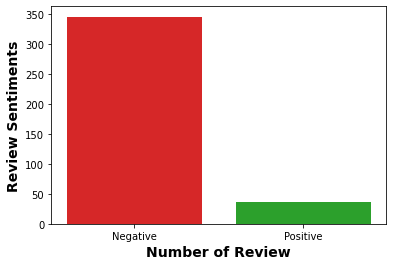

In [43]:
# Visualize the Spanish sentiments

Sentiment_count=df_sent.groupby('sentiment_es').count()
plt.bar(Sentiment_count.index.values, Sentiment_count['Lemma_text'], color=['C3', 'C2'])
plt.ylabel('Review Sentiments',fontweight= 'bold', fontsize = '14')
plt.xlabel('Number of Review', fontweight= 'bold', fontsize = '14')
plt.show()

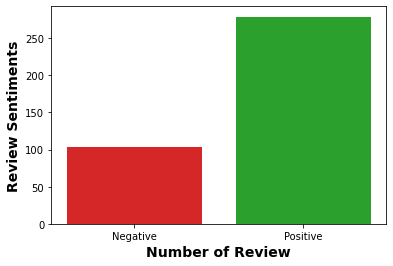

In [42]:
# Visualize the sentiments

Sentiment_count=df_sent.groupby('Vader_sentiment').count()
plt.bar(Sentiment_count.index.values, Sentiment_count['Lemma_text'], color=['C3', 'C2'])
plt.ylabel('Review Sentiments',fontweight= 'bold', fontsize = '14')
plt.xlabel('Number of Review', fontweight= 'bold', fontsize = '14')
plt.show()

In [28]:
print(round(df_sent.Vader_sentiment.value_counts(normalize=True)*100, 2))

Positive    73.04
Negative    26.96
Name: Vader_sentiment, dtype: float64


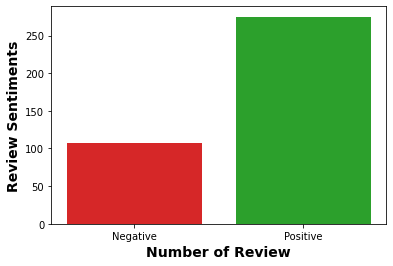

In [44]:
# Visualize the sentiments

Sentiment_count=df_sent.groupby('TextBlob_sent').count()
plt.bar(Sentiment_count.index.values, Sentiment_count['Lemma_text'], color=['C3', 'C2'])
plt.ylabel('Review Sentiments',fontweight= 'bold', fontsize = '14')
plt.xlabel('Number of Review', fontweight= 'bold', fontsize = '14')
plt.show()

In [30]:
print(round(df_sent.TextBlob_sent.value_counts(normalize=True)*100, 2))

Positive    71.99
Negative    28.01
Name: TextBlob_sent, dtype: float64


In [32]:
# https://medium.com/analytics-vidhya/how-to-succeed-in-multilingual-sentiment-analysis-without-transformers-f1a98c76c30c